# 线性回归

## 基本概念
线性回归模型  

$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots+\theta_{n}x_{n}$

· $\hat{y}$是预测值  
· $n$是特征的数目  
· $x_{i}$是第i个特征值  
· $\theta{i}$是第i个特征值的权重

我们可以表示成矩阵形式：  
$\hat{y}=h_{\theta}(x)=\theta^T\cdot x$

· $\theta$是模型的参数向量，包含偏置和各项特征的权重  
· $x$是特征的向量，其中$x_{0}$为1  
· $h_{\theta}$是假设函数  
  
  通常使用MSE即预测值到曲线的距离的平方来评估模型，也即是最小化MSE函数来选择模型  
  MSE损失函数：  
  $MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})^2$  
    
  由于$MSE(X, h_{\theta})$在测试集既定的情况下，只与模型的$\theta$有关，所以我们简单表示为$MSE(\theta)$  
  
 等价问题为：  
$\hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$

## 线性回归模型

使用随机函数生成一个类线性的数据集

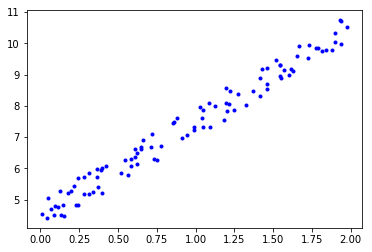

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
plt.plot(X, y, 'b.')

In [2]:
#下面我们根据等式计算参数：
X_b = np.c_[np.ones((100,1)), X]    #这是在每个实例中使得 x0=1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

In [3]:
#使用它来做预测：
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.51359766],
       [ 10.48006601]])

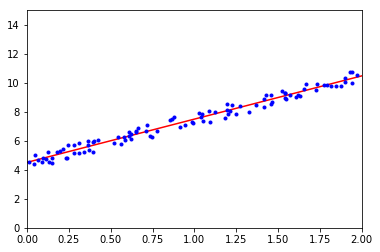

In [4]:
#我们可以将直线和数据在图中做比较
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
#等效的sklearn代码如下：
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[  4.51359766],
       [ 10.48006601]])

## 计算复杂度  
上面的方法通过计算矩阵乘法而得，通常这种计算是$O(n^{2.4})或者O(n^3)$的复杂度，所以当n很大时，计算复杂度很高。
而因为$\theta$与样例是线性关系，所以在处理大量样例时很快，只要能够提供足够的空间。

## 梯度下降算法
梯度下降算法是一个通过迭代寻优的办法：计算所在点关于$\theta$的梯度，找到一个梯度下降的方向，并反复迭代，知道梯度降为0。  

起始点的$\theta$是随机的(称为随机初始化)，一个重要的参数是步长，又被称为学习率(learing rate)的超参数。  

### 梯度下降算法的主要问题
学习率过小会导致迭代时间过长；  
学习率过大会导致无法找到最优点而失败；  
最后曲线还不一定是钟型，这样会导致算法有可能停在局部最优，学习率也不好选择。
但是MSE通常是凸曲线，即是局部最优就是全局最优。

在同样的缩放条件下，MSE曲线是一个碗型，这样GDC算法就径直去向最优点。所以，在使用时，需要将各项特征缩放到相似大小。

### Batch Gradient Descent  
这个算法基于求$MSE(\theta)$关于$\theta_{j}$的偏导实现梯度下降：  
$\frac{\partial}{\partial\theta_{j}}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})x_{j}^{i} $  

通常我们通过矩阵运算直接求得偏导向量：  
$\bigtriangledown_{\theta}MSE(\theta)=\left(\begin{array}{c}{\frac{\partial}{\partial\theta_{0}}MSE(\theta)}\\\frac{\partial}{\partial\theta_{1}}MSE(\theta)\\\cdots\\\frac{\partial}{\partial\theta_{n}}MSE(\theta) \end{array}\right)=\frac {2}{m}X^T\cdot (X\cdot \theta-y)$  
这就是为什么叫Batch，因为每次迭代，都要对使用整个数据集计算得出该时刻的偏导向量。即便如此，该算法和输入特征数目成正比关系，还是比等式计算要快的多。  
一旦我们获得了$\bigtriangledown_{\theta}MSE(\theta)$，我们就能得到下一步$\theta$向量：  

   $\theta^{(nextstep)}=\theta-\eta\bigtriangledown_{\theta}MSE(\theta)$



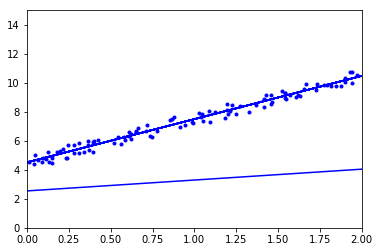

In [12]:
#如下列代码：
eta = 0.1
theta = np.random.randn(2,1)

def plot_batch_gradient_descent(eta, n_iteration=1000, m=100, theta = np.random.randn(2,1)):
    for iteration in range(n_iteration):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration % 50 == 0:
            plt.plot(X_new,  X_new_b.dot(theta), 'b-')
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])
    plt.show()
    
plot_batch_gradient_descent(eta,n_iteration,m,theta)

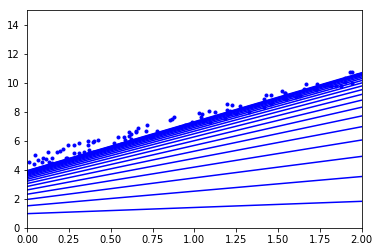

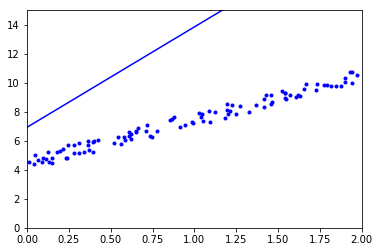

In [17]:
plot_batch_gradient_descent(eta=0.001)
plot_batch_gradient_descent(eta=0.5)

可见，合适的$\eta$才能找到最优解，我们可以使用gridSearch完成。但是，又需要设置一个合适的迭代次数$iteration$,最好的方法就是设置一个较大的迭代次数，在梯度向量达到一个容许值$\epsilon$ 时停下，这样我们就大致达到最优解了：  
收敛速度：迭代次数和学习率大致成反比$O(\frac{1}{iteration})$

### Stochastic Gradient Descent 随机梯度下降
batch Gradient Descent的主要问题就是每步计算都要将整个数据集代入，而随机梯度下降采用的是相反的极端：每次只使用一个样例进行迭代计算。这样的结果相比于batch···，随机梯度下降无法稳定，因此它只能达到好的值，而不能达到最优解。但是当损失函数曲线不规则时，有利于跳出局部最优。  
为了解决不能达到最优解的问题，我们通常采取学习率逐渐减小的办法，这叫做模拟退火方法(simulated annealing),学习率下降函数被称为学习计划(learning schedule)，如果下降过快，可能停止在局部最优，或者停滞不前，如果下降过慢，可能跳过最优点，而需要更长时间才能结束，而此时用户可能中断学习，而训练了一个次优解：

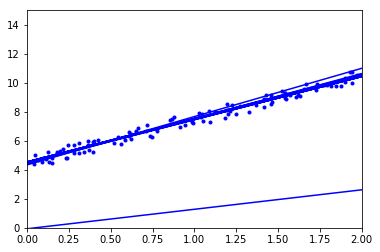

In [24]:
epochs = 50
t0, t1 = 5, 50
m=100

def learing_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learing_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if i == 0:
            plt.plot(X_new,  X_new_b.dot(theta), 'b-')

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

上述的方法可能导致每个epoch中有的数据多次使用，有的数据一次没用，如果要确保每个数据有用，可以打乱原数组的数据，然后依次使用它们。
bgd用了1000次，而sgd只用了50次就计算出不错的结果。  
我们可以用sklearn方法实现：

In [37]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)   #这里的50相当于上面的epoch
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.50179199]), array([ 2.96993674]))

### Mini-batch Gradient Descent
随机使用若干个样本组成mini-batch去计算，比sgd优秀的是，这个算法能够充分利用计算的硬件，如GPU，可以加速矩阵运算，也比SGD更接近最优解

# 多项式回归
如果实际曲线不是一条直线呢，一种方法是将多次的特征列为一个新特征，由此得到的依然是线性的，这种技术被称为多项式回归：

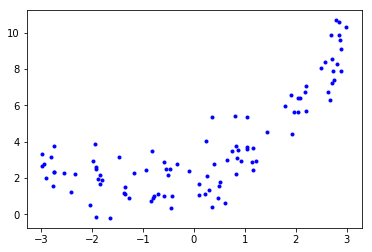

In [38]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

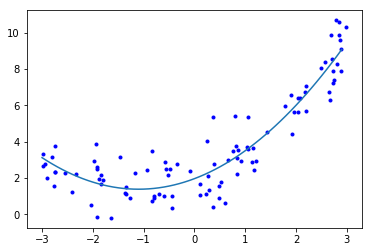

In [46]:
#我们使用sklearn的polynomialFeature构造新的特征数组，然后使用它来做线性回归
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression();
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
plt.plot(X, y, 'b.')

x_poly = np.arange(-3, 3, 0.1)
y_predict_poly = lin_reg.intercept_ + lin_reg.coef_[:,0] * x_poly + lin_reg.coef_[:,1] * x_poly**2
plt.plot(x_poly, y_predict_poly)
plt.show()

degree将所有特征组合，所以当特征很多时，degree增大，会使得特征爆发式增长；  
# 学习曲线
如何选择合适的degree，来保证模型不会过拟合或者欠拟合？  
1.使用交叉验证，观察模型是否在训练集和验证集上都表现出色；  
2.观察学习曲线，这是关于数据集大小和RMSE的曲线图：

[0, 80, 0, 10]

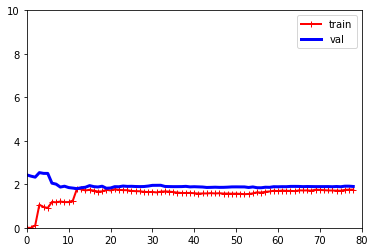

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend()
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 10])

当模型不够强的情况下，增大数据集不能使模型表现的更好，RMSE停在一条水平线附近，因此只能通过修改模型的复杂度来提高：

[0, 80, 0, 10]

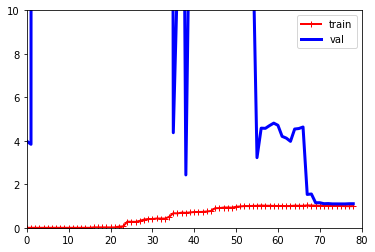

In [132]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
    ('sgd_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 10])

两条曲线间的间隙说明了模型过拟合。而增大数据集可以减少间隙。

# 偏差/方差 折中
3个常用的统计学误差表示：  
1.偏差(bias)：这是由错误假设引起的；大偏差表明模型欠拟合  
2.方差(variance)：这是由于模型对于测试集方差的敏感程度产生的，高方差表明模型过拟合  
3.不可减少的误差(Irreducible errors):这是由于数据本身的噪声引起的，唯一解决办法就是清洗数据，比如检查数据来源，或者检测并去除离群值

# 线性模型正则化  
正则化就是约束模型的自由度，避免其过拟合。线性模型的正则化通常是为模型施加一些权重值：
## 岭回归(Ridge Regression)  
岭回归将$\alpha\sum_{i=1}^{n}\theta_{i}^2$加入到模型的线性损失函数中，不仅使得模型不会过拟合，而且限制系数尽可能的小。如果$\alpha$很大，那么$\theta$每一项都几近为0，拟合的曲线就几乎是一条穿过数据中心的水平线。下面是岭回归的损失函数表达式：  
$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$  
这是一个对数据范围敏感的方法，所以使用前要将数据缩放至合适范围。  
岭回归的解式为：  
$\hat{\theta}=(X^T\cdot X+\alpha A)^{-1}\cdot X^T\cdot y$

In [75]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.26777536]])

In [76]:
#在sgd中使用岭回归：
sgd_reg = SGDRegressor(penalty="l2")    #l2规则对应于岭回归的平方加项
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.4883655])

## LASSO回归
LASSO回归将绝对值加入到模型的损失函数中，被称为l1规则：  
$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^n|\theta_i|$  
特点是这种算法会几乎完全消除非重要特征的权重，这相当于是特征选择，并且将输出一个稀疏矩阵，lasso方法只能接近最优点。

In [77]:
#也可以使用linearregression的l1规则实现
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.23230375])

## 弹性网(Elastic Net)
将l1和l2结合：  
$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$  

In [78]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 5.23004135])

## 模型选择
那我们改用哪个模型呢，岭回归是一个不错的默认值，而当我们需要去掉非关键特征来分析时，可以使用lasso或者弹性网，一般来说当特征数目大于训练数目的时候或者某些数据有强关联时，弹性网比lasso更好。

## 提前中断训练
在GDC这种迭代算法中，与上述正则方法不同，为了避免过拟合，我们可以在验证误差达到最小值时，提前结束迭代。
一种识别方法是，只要出现比过去最小值大的数，就停止迭代。

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2) 

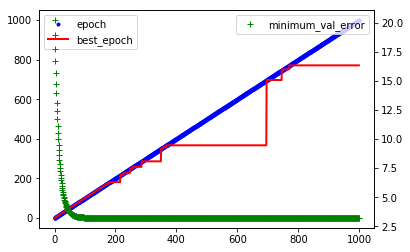

In [189]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate="constant", eta0=0.0005)
#warm_start为TRUE，能够使每次循环开始时，sgd_reg从上次迭代结果继续
minimum_val_error = float("inf")
best_epoch = None
best_model = None

epochs, best_epochs, minimum_val_errors = [], [], []
for epoch in range(1000):
    sgd_reg.fit(X_train_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    best_epochs.append(best_epoch)
    minimum_val_errors.append(minimum_val_error)    
    epochs.append(epoch)

ax1 = plt.subplot()
ax1.plot(epochs, 'b.', linewidth=2, label='epoch')
ax1.plot(best_epochs, 'r-', linewidth=2, label='best_epoch')

ax2 = ax1.twinx()
ax2.plot(minimum_val_errors, 'g+', linewidth=3, label='minimum_val_error')

ax1.legend()
ax2.legend()
plt.show()

# 逻辑回归
## 基本概念
逻辑回归预测概率公式（向量形式）  
$\hat{p}=h_{\theta}(X)=\sigma(\theta^T\cdot X) $  
其中$\sigma(\cdot)$是逻辑函数，如下：  
$\sigma(t)=\frac{1}{1+e^{-t}}$  
当概率大于等于0.5时，我们让输出为1，小于0.5时，输出为0：  
$\hat{y}=\left \{ \begin{array}{ll}1 & if\quad\hat{p}>=0.5 \\0 & if\quad\hat{p}<0.5 \end{array}\right.$  

逻辑回归的损失函数：(单个样例)  
$c(\theta)=\left \{ \begin{array}{ll}-log(\hat{p}) & if\quad y=1 ,\\-log(1-\hat{p}) & if\quad y=0. \end{array}\right.$  
数据集：
$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$  
目前没有直接的等式算法可以得到参数集，但是我们仍然可以用梯度下降算法：  
$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^m(\sigma(\theta^T\cdot x^{(i)})-y^{(i)})x_j^{(i)}$

## 决策限
我们使用著名的iris数据集来说明：

In [190]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target', 'data', 'feature_names', 'DESCR', 'target_names']

In [192]:
X = iris["data"][:,3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris-Virginica, else 0

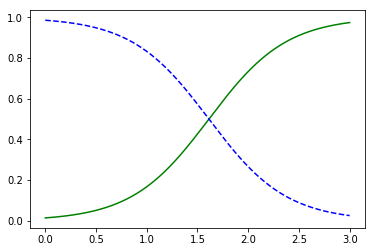

In [197]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris-Virginica")

在1.6附近概率大致为0.5，大于0.5的我们认为是正例，小于的我们认为是反例。
逻辑回归也可以用l1和l2正则化，默认为l2正则，sklearn中正则化参数使用C，而不是$\alpha$，C越大，正则化程度越小。

## Softmax回归
逻辑回归支持多分类，而不需要训练和结合若干个2分类器，这叫做softmax回归或者多项逻辑回归；  
思路很简单，当给出一个样例x，就计算其对第k个类的分数，用来评估其是第k类的概率。这个分数计算函数称为softmax分数(也叫nomalized exponential归一化指数)  
$s_k(x)=\theta_k^T\cdot x$
注意这里单个类的参数是向量$\theta$，所有类的参数放在一起是一个矩阵$\Theta$
一旦这个矩阵，我们就能计算是第k类的概率：  
### softmax function:
$\hat{p}_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\sum_{j=1}^kexp(s_j(x))}$  
其中$K$是类别的顺序数  
$s(x)$是一个包含各个类分数的向量  
$\sigma (s(x))_k$是由$s(x)$得到的x属于k的可能性  
### softmax回归的预测函数  
$\hat{y}=argmax\quad \sigma(s(x))_k=argmax\quad s_k(x)=argmax(\theta_k^T\cdot x)$  
其中argmax是返回使得函数最大的变量的操作符。每次只返回一个变量。  
下面是交叉熵来表示的softmax的损失函数:  
$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}log(\hat{p}_k^{(i)})$
其中$y_k^{(i)}$当第i个样例属于k类时为1，否则为0.  
  
对$\theta_k$的导向量：  
$\bigtriangledown\theta_kJ(\Theta)=\frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)}-y_k^{(i)})x^{(i)}$  
  
sklearn中logisticregression默认使用OvA执行多分类，也可以通过设置Multi_class为"multinomial"切换为softmax regression， 还必须特例化支持softmax回归的solver，如"lbfgs":

In [198]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]])

array([2])

In [199]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])